In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform, exposure, filters, feature, color, data
import os

In [18]:
def boxes(image,n_boxes = 25, min_width=10, min_height=10, min_ratio=0.5, max_ratio=2):
    coords = np.zeros([n_boxes,4],'int16')#[r1,c1,r2,c2]
    height = image.shape[0]
    width = image.shape[1]
    for i in range(n_boxes):
        ratio = 0
        while((min_ratio>ratio) or (ratio>max_ratio)):
            r1 = np.random.randint(0, height - min_height)
            c1 = np.random.randint(0, width - min_width)
            r2 = np.random.randint(r1 + min_height - 1, height)
            c2 = np.random.randint(c1 + min_width - 1, width)
            ratio = (c2 - c1) / (r2 - r1)
            coords[i,:] = [r1, c1, r2, c2]
    return coords
        

In [19]:
img = data.astronaut()
windows = boxes(img)
windows

array([[486, 446, 509, 475],
       [494, 500, 508, 509],
       [169,  17, 464, 390],
       [302,  86, 469, 174],
       [130, 326, 322, 483],
       [204,  59, 237,  86],
       [251, 116, 433, 440],
       [283, 188, 376, 307],
       [239, 204, 389, 350],
       [317, 188, 353, 246],
       [379, 463, 431, 500],
       [352, 269, 498, 496],
       [476, 465, 491, 489],
       [331,   5, 412, 107],
       [175, 268, 276, 337],
       [271, 445, 314, 502],
       [223, 385, 276, 454],
       [227,  88, 388, 211],
       [ 40,  41, 321, 231],
       [164, 204, 324, 344],
       [ 55,  96, 313, 320],
       [ 31, 362, 106, 501],
       [133,  20, 508, 377],
       [244, 303, 280, 372],
       [332,  97, 454, 201]], dtype=int16)

In [26]:
def drawbox(image, r1, c1, r2, c2, color=[255,255,0], linewidth = 1):
    if len(image.shape)==2:
        r = image
        g = image
        b = image
        image = np.stack((r,g,b),axis=2) 
    
    mask = np.zeros([r2-r1, c2-c1, 3],'uint8')
    for plane in range(3):
        mask[:,:,plane] = color[plane]
    image2 = np.copy(image)
    image2[r1:r2, c1:c2, :] = mask
    image2[r1+linewidth:r2-linewidth, c1+linewidth:c2-linewidth, :] = image[r1+linewidth:r2-linewidth, c1+linewidth:c2-linewidth, :]
    return image2

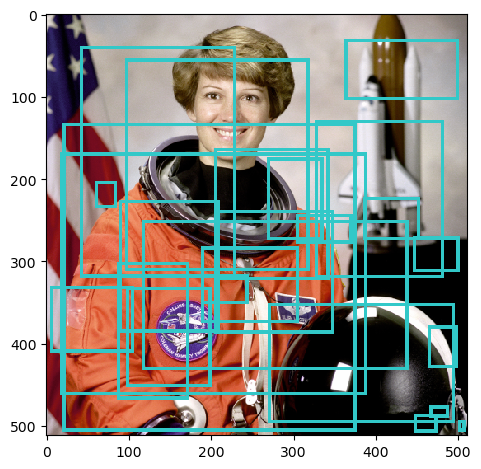

In [29]:
for i in range(windows.shape[0]):
    img = drawbox(img, windows[i,0],windows[i,1],windows[i,2],windows[i,3],linewidth=4,color=[50,200,200])
    
io.imshow(img)